In [18]:
import yfinance as yf
import pandas as pd

data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')

print(data.head())
print("Data shape:", data.shape)

C:\Users\ghosh\AppData\Local\Temp\ipykernel_9600\2721199302.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.426815  40.436204  39.722760  39.933979  102223600
2018-01-03  40.419781  40.964251  40.356418  40.490187  118071600
2018-01-04  40.607529  40.710791  40.384579  40.492532   89738400
2018-01-05  41.069859  41.156691  40.612224  40.703751   94640000
2018-01-08  40.917324  41.213026  40.818753  40.917324   82271200
Data shape: (1509, 5)


In [19]:
data.columns = data.columns.get_level_values(0
data = data[['Close']].copy()

data['Prev Close'] = data['Close'].shift(1)

data.dropna(inplace=True)

print(data.head())
print("Data after cleaning:", data.shape)


Price           Close  Prev Close
Date                             
2018-01-03  40.419781   40.426815
2018-01-04  40.607529   40.419781
2018-01-05  41.069859   40.607529
2018-01-08  40.917324   41.069859
2018-01-09  40.912617   40.917324
Data after cleaning: (1508, 2)


In [22]:
from sklearn.model_selection import train_test_split

X = data[['Prev Close']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [23]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

pred_lr = model_lr.predict(X_test_scaled)


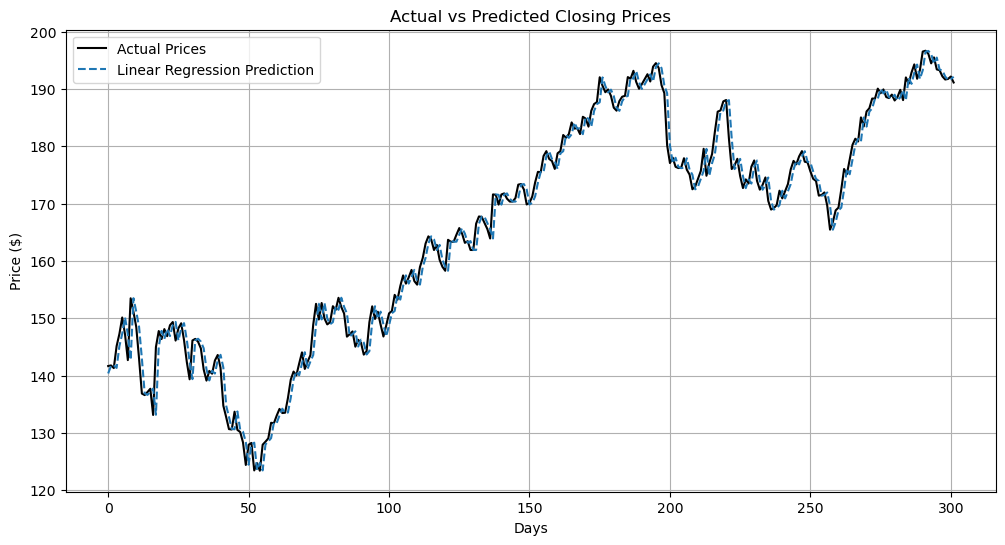

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='black')
plt.plot(pred_lr, label='Linear Regression Prediction', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression:")
print("RMSE:", mean_squared_error(y_test, pred_lr))
print("R² Score:", r2_score(y_test, pred_lr))



Linear Regression:
RMSE: 5.961313526780004
R² Score: 0.9844298949404915
